# WeatherPy

# Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
#you need to install --!pip install citipy
#!conda activate geoviews

  Using cached citipy-0.0.6.tar.gz (675 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached kdtree-0.16-py2.py3-none-any.whl (7.7 kB)
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675977 sha256=5d01e804ba21b02833ee66d41f24df2f6d65fc97c2b0013395387005d00fafc8
  Stored in directory: c:\users\osvar\appdata\local\pip\cache\wheels\4b\b5\88\49107ff846ec6967b34c17d369176c591fc90ed93b706755ad
Successfully built citipy


In [149]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
import hvplot

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


In [138]:
#x, y = [1, 2, 3, 4, 5, 6, 7], [10, 9, 2.5, 6, 4, 3, 2]
#res = st.pearsonr(x, y)
#res

PearsonRResult(statistic=-0.828503883588428, pvalue=0.021280260007523286)

### Generate the Cities List by Using the `citipy` Library

In [150]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [151]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date =  city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lerwick
Processing Record 2 of Set 1 | maceio
Processing Record 3 of Set 1 | kapa'a
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | petropavlovsk-kamchatsky
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | nuuk
Processing Record 9 of Set 1 | duncan town
City not found. Skipping...
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | hawaiian paradise park
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | trinity beach
Processing Record 16 of Set 1 | colonia
Processing Record 17 of Set 1 | ciudad bolivar
Processing Record 18 of Set 1 | crane
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | dudinka
Processing Record 21 of Set 1 | wailua homest

Processing Record 40 of Set 4 | lompoc
Processing Record 41 of Set 4 | mantenopolis
Processing Record 42 of Set 4 | kitimat
Processing Record 43 of Set 4 | praia da vitoria
Processing Record 44 of Set 4 | ierapetra
Processing Record 45 of Set 4 | iskateley
Processing Record 46 of Set 4 | luza
Processing Record 47 of Set 4 | san antonio de pale
Processing Record 48 of Set 4 | lebu
Processing Record 49 of Set 4 | roma
Processing Record 0 of Set 5 | shimoda
Processing Record 1 of Set 5 | veymandoo
City not found. Skipping...
Processing Record 2 of Set 5 | wynyard
Processing Record 3 of Set 5 | ostroleka
Processing Record 4 of Set 5 | malango
Processing Record 5 of Set 5 | atafu village
Processing Record 6 of Set 5 | chonchi
Processing Record 7 of Set 5 | indramayu
Processing Record 8 of Set 5 | valparaiso
Processing Record 9 of Set 5 | georgetown
Processing Record 10 of Set 5 | bridgewater
Processing Record 11 of Set 5 | bozoum
Processing Record 12 of Set 5 | salinopolis
Processing Record

Processing Record 30 of Set 8 | mweka
Processing Record 31 of Set 8 | lihue
Processing Record 32 of Set 8 | sonsorol village
City not found. Skipping...
Processing Record 33 of Set 8 | pimentel
Processing Record 34 of Set 8 | el jadid
Processing Record 35 of Set 8 | horta
Processing Record 36 of Set 8 | amacuzac
Processing Record 37 of Set 8 | ardestan
Processing Record 38 of Set 8 | toliara
Processing Record 39 of Set 8 | bacsalmas
Processing Record 40 of Set 8 | rovaniemi
Processing Record 41 of Set 8 | hithadhoo
Processing Record 42 of Set 8 | tonota
Processing Record 43 of Set 8 | viligili
City not found. Skipping...
Processing Record 44 of Set 8 | ahau
City not found. Skipping...
Processing Record 45 of Set 8 | coria
Processing Record 46 of Set 8 | san antonio del estrecho
City not found. Skipping...
Processing Record 47 of Set 8 | talara
Processing Record 48 of Set 8 | kargasok
Processing Record 49 of Set 8 | kroya
Processing Record 0 of Set 9 | chinde
Processing Record 1 of Set 

Processing Record 15 of Set 12 | tuba city
Processing Record 16 of Set 12 | muromtsevo
Processing Record 17 of Set 12 | kawthoung
City not found. Skipping...
Processing Record 18 of Set 12 | strelka
Processing Record 19 of Set 12 | felidhoo
City not found. Skipping...
Processing Record 20 of Set 12 | bayganin
Processing Record 21 of Set 12 | el fasher
Processing Record 22 of Set 12 | dubbo
Processing Record 23 of Set 12 | taghazout
Processing Record 24 of Set 12 | sokoni
Processing Record 25 of Set 12 | mednogorsk
Processing Record 26 of Set 12 | trairi
Processing Record 27 of Set 12 | upington
Processing Record 28 of Set 12 | eseka
Processing Record 29 of Set 12 | kuqa
Processing Record 30 of Set 12 | cova figueira
Processing Record 31 of Set 12 | hami
Processing Record 32 of Set 12 | mili
Processing Record 33 of Set 12 | plastun
Processing Record 34 of Set 12 | ca mau
Processing Record 35 of Set 12 | kenai
Processing Record 36 of Set 12 | preobrazheniye
Processing Record 37 of Set 12

In [152]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [153]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lerwick,60.1545,-1.1494,13.00,73,100,13.04,GB,1691592767
1,maceio,-9.6658,-35.7353,27.69,69,75,5.14,BR,1691592861
2,kapa'a,22.0752,-159.3190,27.18,81,100,8.75,US,1691592874
3,port-aux-francais,-49.3500,70.2167,2.47,75,14,8.67,TF,1691592875
4,petropavlovsk-kamchatsky,53.0452,158.6483,13.33,77,0,4.00,RU,1691592685


In [154]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [155]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lerwick,60.1545,-1.1494,13.00,73,100,13.04,GB,1691592767
1,maceio,-9.6658,-35.7353,27.69,69,75,5.14,BR,1691592861
2,kapa'a,22.0752,-159.3190,27.18,81,100,8.75,US,1691592874
3,port-aux-francais,-49.3500,70.2167,2.47,75,14,8.67,TF,1691592875
4,petropavlovsk-kamchatsky,53.0452,158.6483,13.33,77,0,4.00,RU,1691592685


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

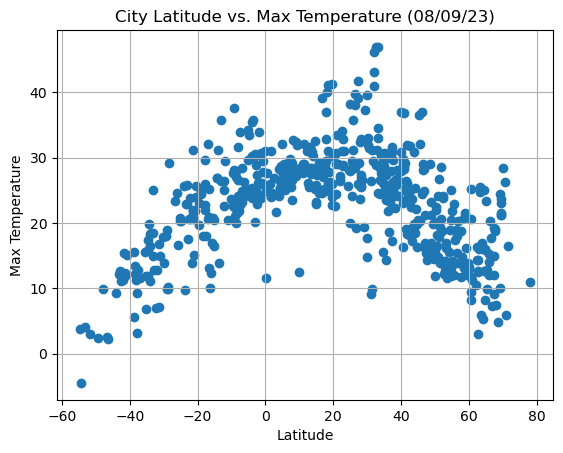

In [156]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

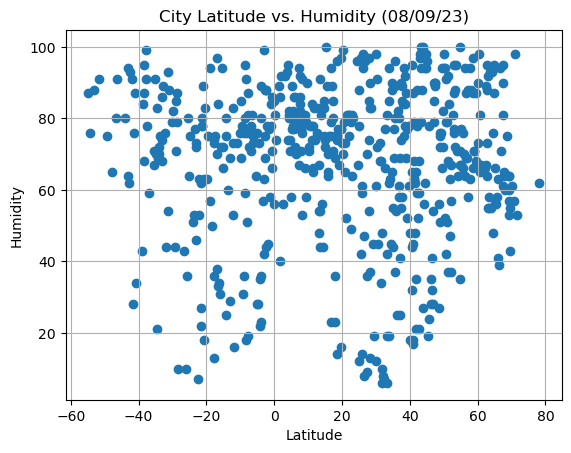

In [157]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)"% time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

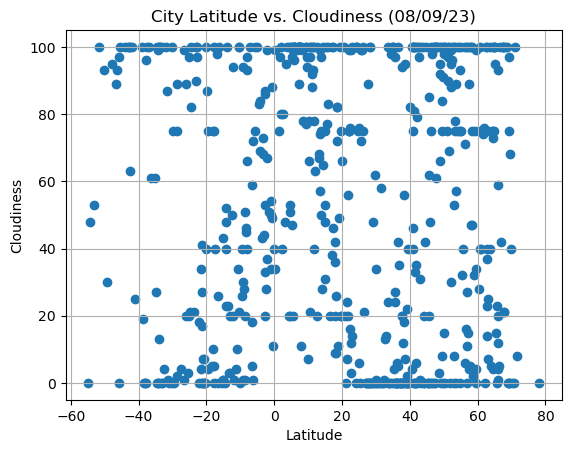

In [147]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%s)"% time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

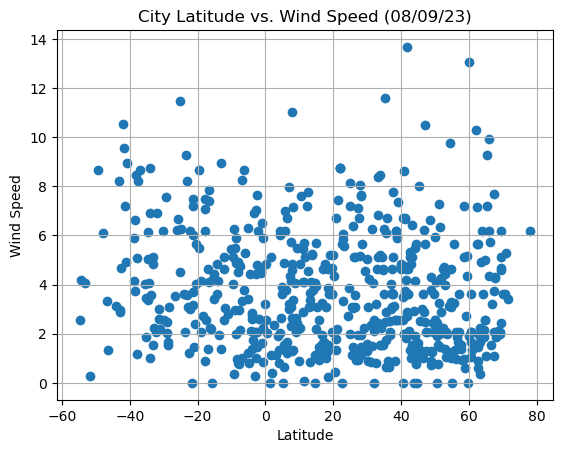

In [158]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed (%s)"% time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [183]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    r = st.pearsonr(x_values, y_values)
    print(f"The r-value is: {r[0]}")
    print(f"The p_value is: {r[1]}")

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [180]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lerwick,60.1545,-1.1494,13.00,73,100,13.04,GB,1691592767
2,kapa'a,22.0752,-159.3190,27.18,81,100,8.75,US,1691592874
4,petropavlovsk-kamchatsky,53.0452,158.6483,13.33,77,0,4.00,RU,1691592685
5,albany,42.6001,-73.9662,24.89,68,98,1.34,US,1691592634
6,iqaluit,63.7506,-68.5145,5.85,93,100,4.92,CA,1691592687


In [181]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,maceio,-9.6658,-35.7353,27.69,69,75,5.14,BR,1691592861
3,port-aux-francais,-49.3500,70.2167,2.47,75,14,8.67,TF,1691592875
9,waitangi,-43.9535,-176.5597,9.34,80,59,3.13,NZ,1691592875
10,blackmans bay,-43.0167,147.3167,12.07,64,100,2.97,AU,1691592875
12,port elizabeth,-33.9180,25.5701,18.39,72,75,8.75,ZA,1691592775


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.5936638256215205
The p_value is: 1.8679736053847768e-39


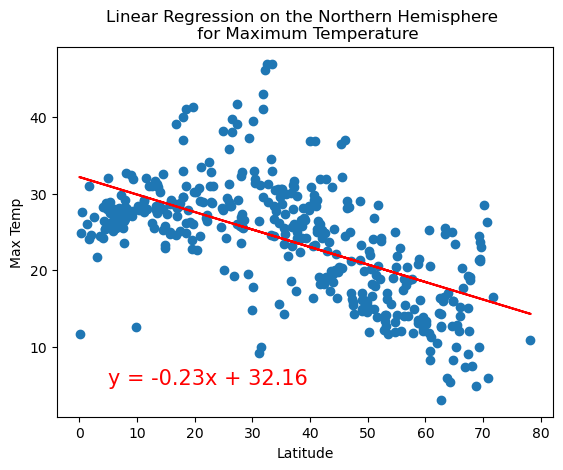

In [184]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.title(f"Linear Regression on the Northern Hemisphere \n for Maximum Temperature")

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere for Maximum Temperature", 
                       "Max Temp",(5,5))

The r-value is: 0.8095010877666934
The p_value is: 5.280820045459488e-40


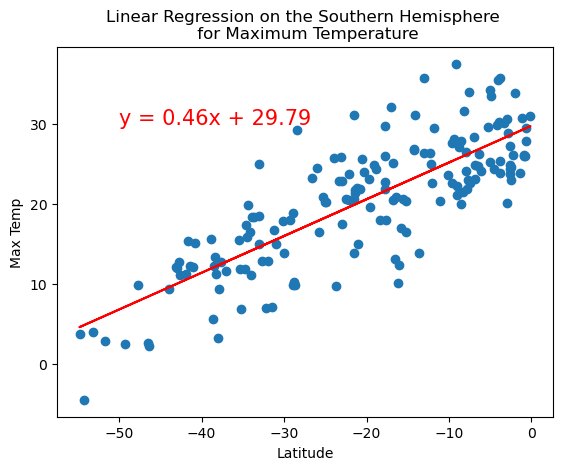

In [185]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.title(f"Linear Regression on the Southern Hemisphere \n for Maximum Temperature")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 
                       'Max Temp',(-50,30))

**Discussion about the linear relationship:** The linear regression is modeling what happens to temperature as latitudes increase in the northern and southern hemispheres. In addition, this means that for the northern hemisphere as latitude increases you move further away from the equator. On the other hand, in the southern hemisphere latitudes decrease as we move away from the equator. For the northern hemisphere there is a significant negative correlation between latitude and maximum temperature. Whereas, in the southern hemisphere there is a positive correlation between latitude and maximum temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.05826840582523992
The p_value is: 0.24494751239504658


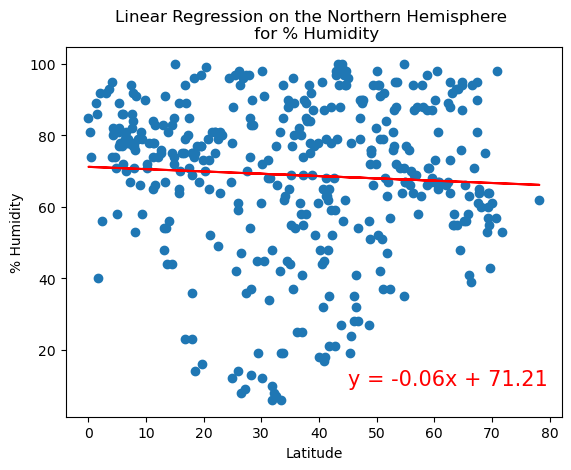

In [186]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.title(f"Linear Regression on the Northern Hemisphere \n for % Humidity")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', 
                       '% Humidity',(45,10))

The r-value is: -0.16952023226696822
The p_value is: 0.028516524483361033


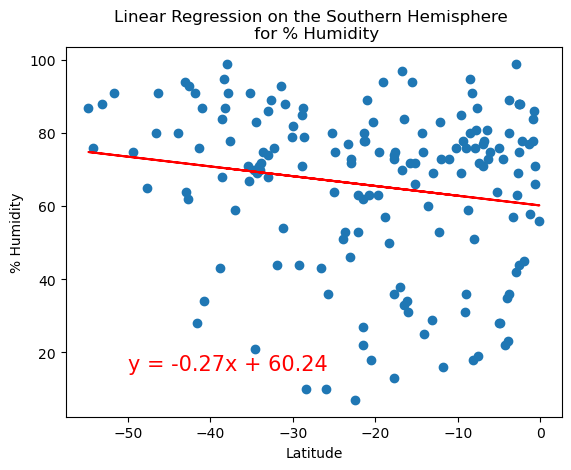

In [187]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.title(f"Linear Regression on the Southern Hemisphere \n for % Humidity")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', 
                       '% Humidity',(-50,15))

**Discussion about the linear relationship:** 
The linear regression is modeling what happens to humidity as latitude decrease in the northern and southern hemispheres. As latitude decrease for the northern hemisphere we move further away from the equator, and as latitude decrease for the southern hemisphere we move to the equator.
As latitude decrease in the northern hemisphere so does humidity, which means there is a negative correlation. There is no significant correlation between latitudes and humidity in the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.07116574775002928
The p_value is: 0.15541490330698127


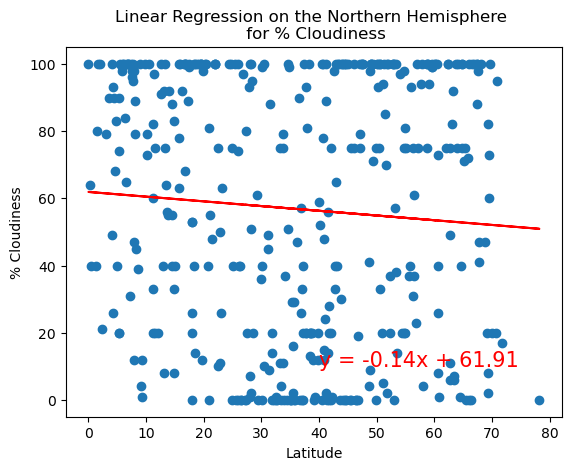

In [188]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.title(f"Linear Regression on the Northern Hemisphere \n for % Cloudiness")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(40,10))

The r-value is: -0.14503689049579024
The p_value is: 0.061468156736790326


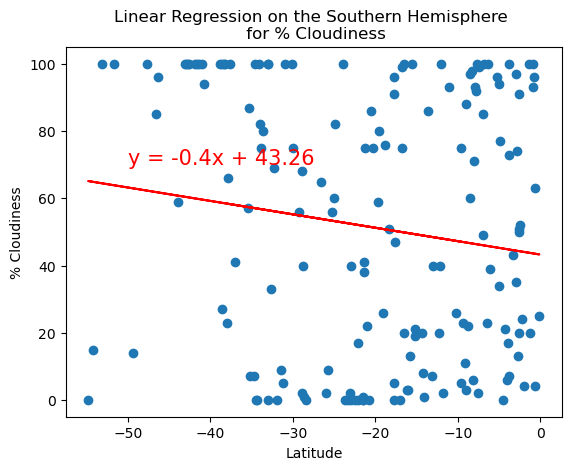

In [189]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.title(f"Linear Regression on the Southern Hemisphere \n for % Cloudiness")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(-50,70))

**Discussion about the linear relationship:** The linear regression is modeling what happens to cloudiness as latitudes decrease in the northern and southern hemispheres. As latitude decrease for the northern hemisphere we move further away from the equator, and as latitude decrease for the southern hemisphere we move closer to the equator. For the northern hemisphere, decrease in latitude appear to be weakly related to decrease in cloudiness, but there is significant negative relationship/correlation. On the other hand, there is no relationship between latitude and cloudiness in the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0071257404334752845
The p_value is: 0.8870242309988863


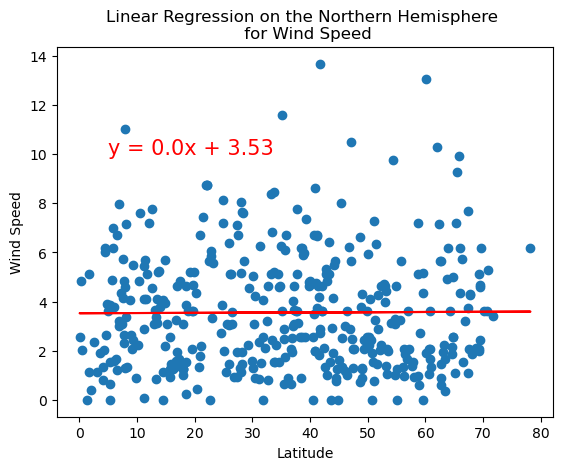

In [190]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.title("Linear Regression on the Northern Hemisphere \n for Wind Speed")

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for Wind Speed", 
                       "Wind Speed",(5,10))

The r-value is: -0.18797466361844822
The p_value is: 0.014988846188932288


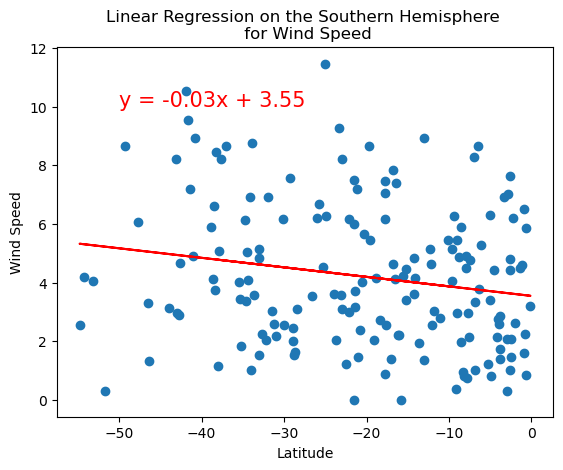

In [191]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.title("Linear Regression on the Southern Hemisphere \n for Wind Speed")

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for Wind Speed", 
                       "Wind Speed",(-50,10))

**Discussion about the linear relationship:** The linear regression is modeling what happens to wind speed as latitudes increase in the northern and southern hemispheres. As latitude increases for the northern hemisphere we move further away from the equator, and as latitude increases for the southern hemisphere we move closer to the equator. In the northern hemisphere, although the relationship between increasing latitude and wind speed is significant (based on the p-value), there only appears to be a weak correlation. On the other hand, in the southern hemisphere there is no correlation between the increasing latitude and wind speed.